        ticker   price  face_value       ytm
0     USBND786   95.43      1000.0  0.075417
1     USBND786   96.26      1000.0  0.073219
2     USBND786   95.46      1000.0  0.075337
3     USBND786   94.97      1000.0  0.076645
4     USBND786   94.75      1000.0  0.077235
...        ...     ...         ...       ...
2550  EUBND751  108.40      1000.0  0.129653
2551  EUBND751  108.19      1000.0  0.130319
2552  EUBND751  108.25      1000.0  0.130129
2553  EUBND751  107.93      1000.0  0.131146
2554  EUBND751  108.30      1000.0  0.129970

[2555 rows x 4 columns]


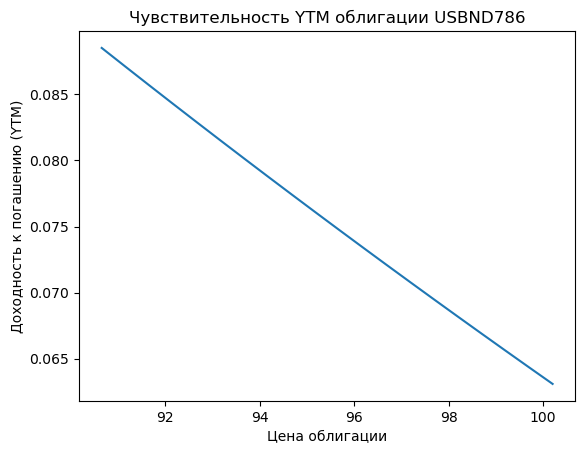

In [5]:
import sys
import os
import pytest

# Добавляем родительскую папку (portfolio-analysis) в sys.path
sys.path.append(os.path.abspath('..'))

from bond_utils import load_bond_data, compute_ytm, calc_all_ytm

def test_load_bond_data():
    df = load_bond_data()
    assert not df.empty, "Данные облигаций не должны быть пустыми"
    assert 'payment_schedule' in df.columns, "В данных должна быть колонка payment_schedule"

def test_compute_ytm():
    # Тестовые данные для расчёта YTM
    payment_schedule_json = '{"schedule":[{"date":"2025-07-01","amount":5},{"date":"2026-07-01","amount":105}]}'
    ytm = compute_ytm(
        calc_date="2024-07-01",
        price=100,
        face_value=100,
        payment_schedule_json=payment_schedule_json
    )
    assert ytm is not None, "YTM должен быть рассчитан"
    assert 0 < ytm < 1, "YTM должен быть в разумных пределах (0 < ytm < 1)"

def test_calc_all_ytm():
    df = load_bond_data()
    calc_date = "2024-07-01"
    bond_df = calc_all_ytm(df, calc_date)
    assert 'ytm' in bond_df.columns, "В результате должен быть столбец ytm"
    assert not bond_df['ytm'].isnull().all(), "YTM должен быть рассчитан хотя бы для одной облигации"